# Altair

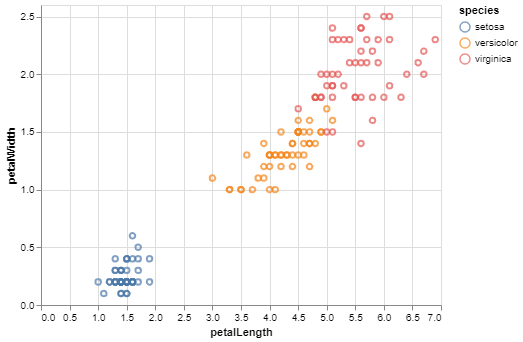

In [1]:
import altair as alt
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

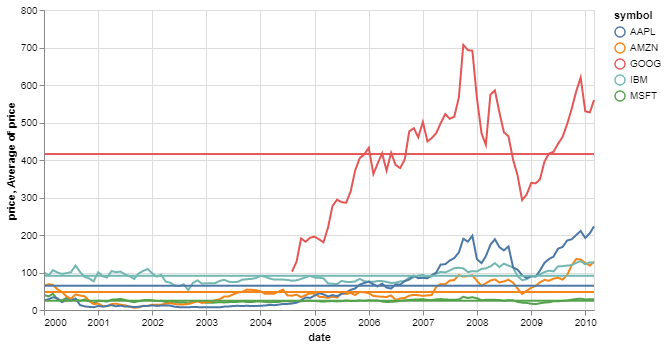

In [3]:
import altair as alt
from vega_datasets import data

source = data.stocks()

base = alt.Chart(source).properties(width=550)

line = base.mark_line().encode(
    x='date',
    y='price',
    color='symbol'
)

rule = base.mark_rule().encode(
    y='average(price)',
    color='symbol',
    size=alt.value(2)
)

line + rule

In [ ]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Horsepower', 'Acceleration', 'Miles_per_Gallon'],
    column=['Miles_per_Gallon', 'Acceleration', 'Horsepower']
).interactive()

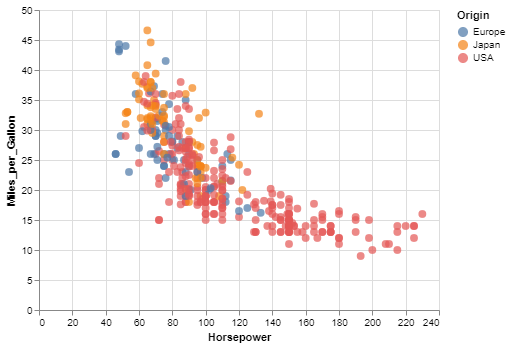

In [18]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

# Iteractive plots


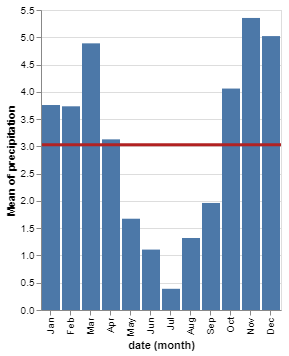

In [5]:
import altair as alt
from vega_datasets import data

source = data.seattle_weather()
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='month(date):O',
    y='mean(precipitation):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(precipitation):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=source)

https://altair-viz.github.io/gallery/index.html#interactive-charts

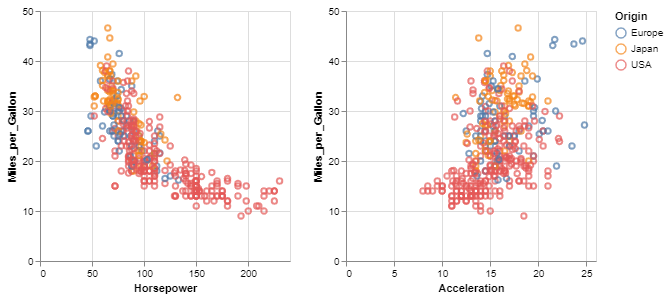

In [1]:
import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(source).mark_point().encode(
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray')),
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

base.encode(x='Horsepower') | base.encode(x='Acceleration')

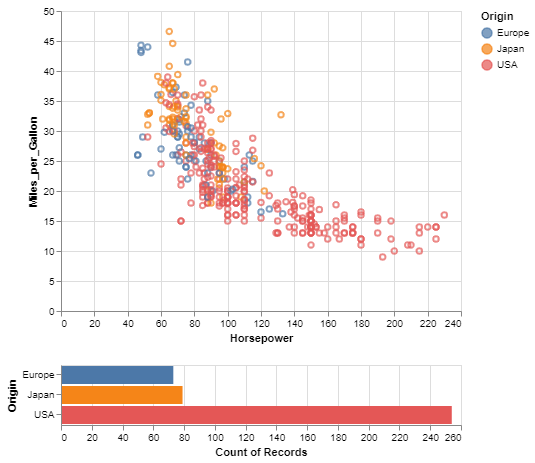

In [8]:
import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)

points & bars

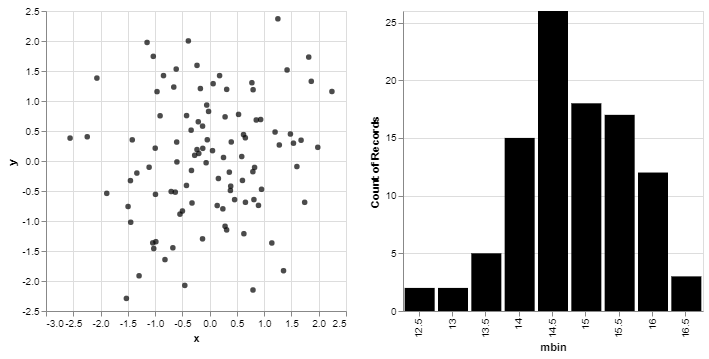

In [9]:
import altair as alt
import pandas as pd
import numpy as np

x = np.random.normal(size=100)
y = np.random.normal(size=100)

m = np.random.normal(15, 1, size=100)

source = pd.DataFrame({"x": x, "y":y, "m":m})

# interval selection in the scatter plot
pts = alt.selection(type="interval", encodings=["x"])

# left panel: scatter plot
points = alt.Chart().mark_point(filled=True, color="black").encode(
    x='x',
    y='y'
).transform_filter(
    pts
).properties(
    width=300,
    height=300
)

# right panel: histogram
mag = alt.Chart().mark_bar().encode(
    x='mbin:N',
    y="count()",
    color=alt.condition(pts, alt.value("black"), alt.value("lightgray"))
).properties(
    width=300,
    height=300
).add_selection(pts)

# build the chart:
alt.hconcat(
    points,
    mag,
    data=source
).transform_bin(
    "mbin",
    field="m",
    bin=alt.Bin(maxbins=20)
)


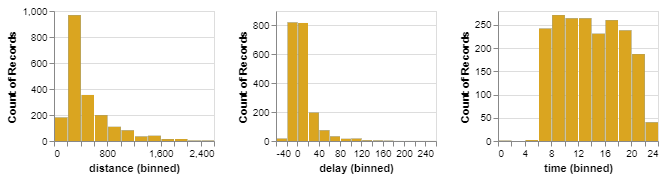

In [15]:
import altair as alt
from vega_datasets import data

source = alt.UrlData(
    data.flights_2k.url,
    format={'parse': {'date': 'date'}}
)

brush = alt.selection(type='interval', encodings=['x'])

# Define the base chart, with the common parts of the
# background and highlights
base = alt.Chart().mark_bar().encode(
    x=alt.X(alt.repeat('column'), type='quantitative', bin=alt.Bin(maxbins=20)),
    y='count()'
).properties(
    width=160,
    height=130
)

# blue background with selection
background = base.add_selection(brush)

# yellow highlights on the transformed data
highlight = base.encode(
    color=alt.value('goldenrod')
).transform_filter(brush)

# layer the two charts & repeat
alt.layer(
    background,
    highlight,
    data=source
).transform_calculate(
    "time",
    "hours(datum.date)"
).repeat(column=["distance", "delay", "time"])

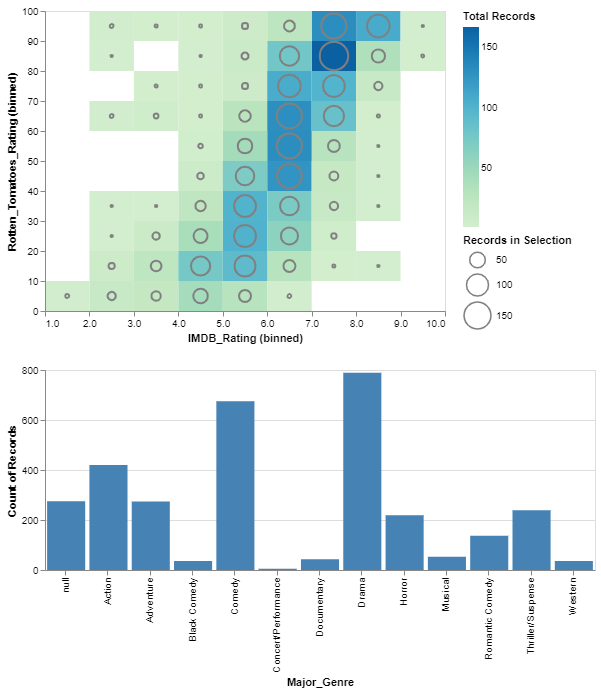

In [2]:
import altair as alt
from vega_datasets import data

source = data.movies.url

pts = alt.selection(type="single", encodings=['x'])

rect = alt.Chart(data.movies.url).mark_rect().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Records')
    )
)

circ = rect.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='Records in Selection')
    )
).transform_filter(
    pts
)

bar = alt.Chart(source).mark_bar().encode(
    x='Major_Genre:N',
    y='count()',
    color=alt.condition(pts, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=550,
    height=200
).add_selection(pts)

alt.vconcat(
    rect + circ,
    bar
).resolve_legend(
    color="independent",
    size="independent"
)

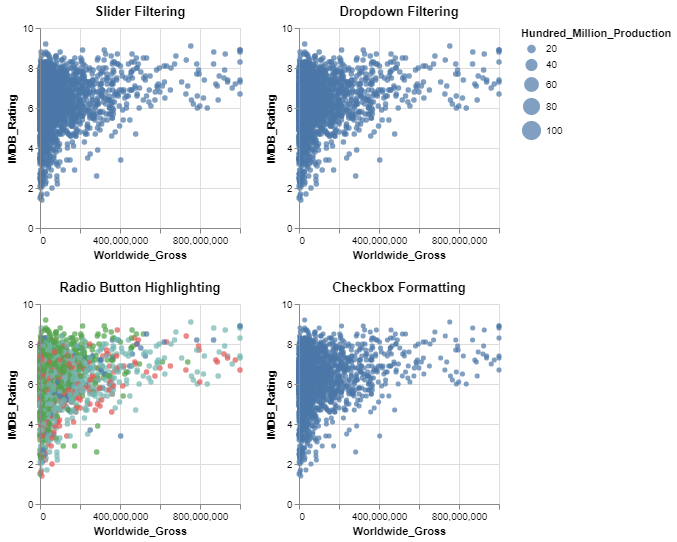

In [16]:
import altair as alt
from vega_datasets import data

movies = alt.UrlData(
    data.movies.url,
    format=alt.DataFormat(parse={"Release_Date":"date"})
)
ratings = ['G', 'NC-17', 'PG', 'PG-13', 'R']
genres = ['Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror', 'Musical',
       'Romantic Comedy', 'Thriller/Suspense', 'Western']

base = alt.Chart(movies, width=200, height=200).mark_point(filled=True).transform_calculate(
    Rounded_IMDB_Rating = "floor(datum.IMDB_Rating)",
    Hundred_Million_Production =  "datum.Production_Budget > 100000000.0 ? 100 : 10",
    Release_Year = "year(datum.Release_Date)"
).transform_filter(
    alt.datum.IMDB_Rating > 0
).transform_filter(
    alt.FieldOneOfPredicate(field='MPAA_Rating', oneOf=ratings)
).encode(
    x=alt.X('Worldwide_Gross:Q', scale=alt.Scale(domain=(100000,10**9), clamp=True)),
    y='IMDB_Rating:Q',
    tooltip="Title:N"
)

# A slider filter
year_slider = alt.binding_range(min=1969, max=2018, step=1)
slider_selection = alt.selection_single(bind=year_slider, fields=['Release_Year'], name="Release Year_")


filter_year = base.add_selection(
    slider_selection
).transform_filter(
    slider_selection
).properties(title="Slider Filtering")

# A dropdown filter
genre_dropdown = alt.binding_select(options=genres)
genre_select = alt.selection_single(fields=['Major_Genre'], bind=genre_dropdown, name="Genre")

filter_genres = base.add_selection(
    genre_select
).transform_filter(
    genre_select
).properties(title="Dropdown Filtering")

#color changing marks
rating_radio = alt.binding_radio(options=ratings)

rating_select = alt.selection_single(fields=['MPAA_Rating'], bind=rating_radio, name="Rating")
rating_color_condition = alt.condition(rating_select,
                      alt.Color('MPAA_Rating:N', legend=None),
                      alt.value('lightgray'))

highlight_ratings = base.add_selection(
    rating_select
).encode(
    color=rating_color_condition
).properties(title="Radio Button Highlighting")

# Boolean selection for format changes
input_checkbox = alt.binding_checkbox()
checkbox_selection = alt.selection_single(bind=input_checkbox, name="Big Budget Films")

size_checkbox_condition = alt.condition(checkbox_selection,
                                        alt.SizeValue(25),
                                        alt.Size('Hundred_Million_Production:Q')
                                       )

budget_sizing = base.add_selection(
    checkbox_selection
).encode(
    size=size_checkbox_condition
).properties(title="Checkbox Formatting")

( filter_year | filter_genres) &  (highlight_ratings | budget_sizing  )

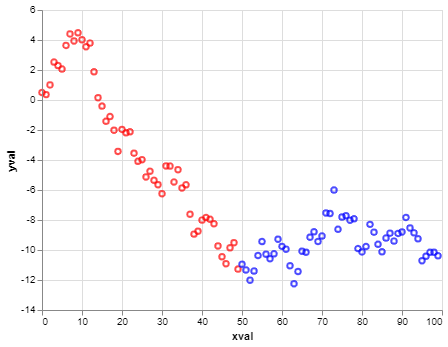

In [1]:
import altair as alt
import pandas as pd
import numpy as np

rand = np.random.RandomState(42)

df = pd.DataFrame({
    'xval': range(100),
    'yval': rand.randn(100).cumsum()
})

slider = alt.binding_range(min=0, max=100, step=1, name='cutoff:')
selector = alt.selection_single(name="SelectorName", fields=['cutoff'],
                                bind=slider, init={'cutoff': 50})

alt.Chart(df).mark_point().encode(
    x='xval',
    y='yval',
    color=alt.condition(
        alt.datum.xval < selector.cutoff,
        alt.value('red'), alt.value('blue')
    )
).add_selection(
    selector
)

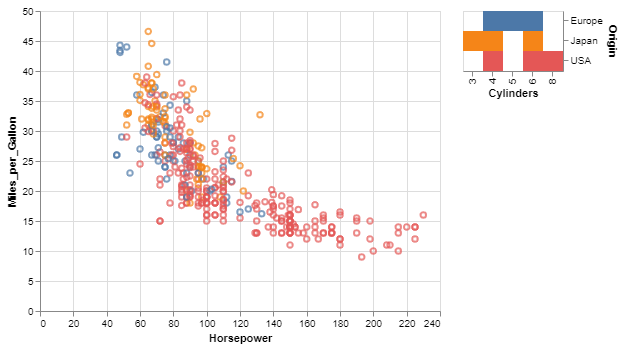

In [2]:
"""
The legend is a 2D grid that can be selected by shift clicking
e.g. can select Japan for a specific Cylinder, for all Cyclinders or any other selection
"""
import altair as alt
from vega_datasets import data
cars = data.cars()

selection = alt.selection_multi(fields=['Origin', 'Cylinders'])
color = alt.condition(selection,
                      alt.Color('Origin:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
)

legend = alt.Chart(cars).mark_rect().encode(
    y=alt.Y('Origin:N', axis=alt.Axis(orient='right')),
    x='Cylinders:O',
    color=color
).add_selection(
    selection
)

scatter | legend

# Compound charts
https://altair-viz.github.io/user_guide/compound_charts.html

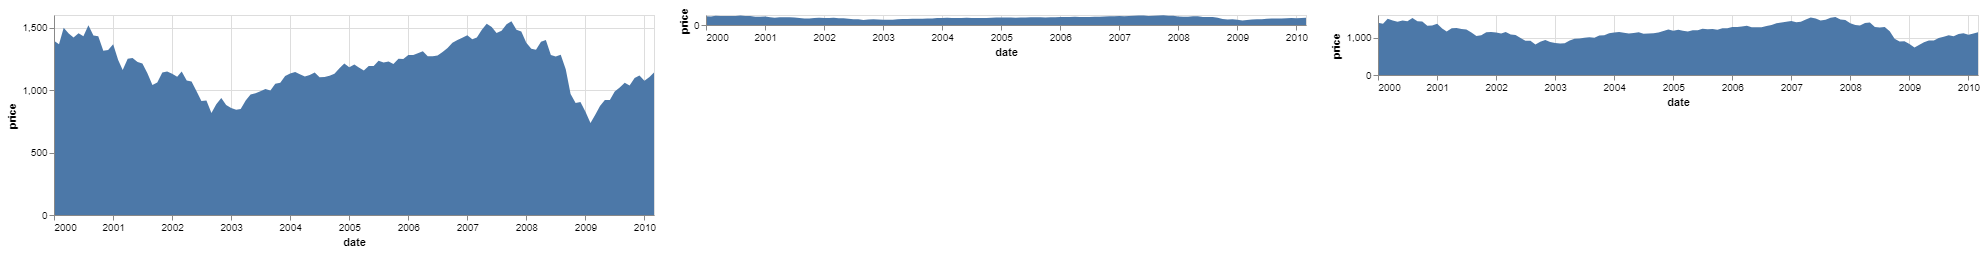

In [8]:
"""
Vconcat/Hconcat
"""
import altair as alt
from vega_datasets import data
sp500 = data.sp500.url

brush = alt.selection(type='interval', encodings=['x'])

upper = alt.Chart(sp500).mark_area().encode(
    x=alt.X('date:T', scale=alt.Scale(domain=brush)),
    y='price:Q'
).properties(
    width=600,
    height=200
)

mid = upper.properties(
    height=10,
).add_selection(brush)

lower = upper.properties(
    height=60
).add_selection(brush)

alt.vconcat(upper, mid, lower)  # <<< Vconcat a list of plots
#alt.hconcat(upper, mid, lower) # <<< Hconcat a list of plots
#upper | mid | lower            # NOTE: Pipe '|' can be used instead for hconcat


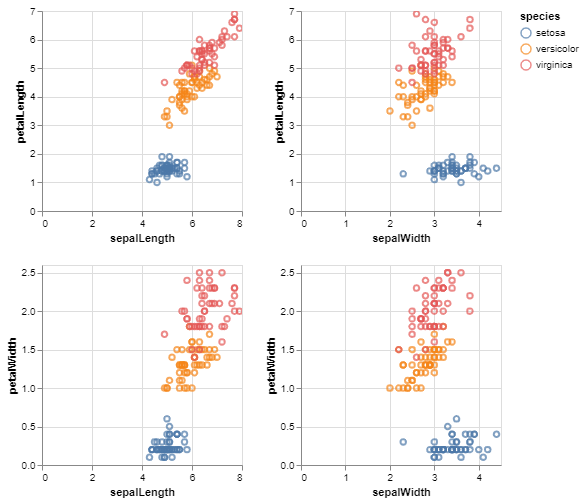

In [3]:
"""
RepeatChart
"""
import altair as alt
from vega_datasets import data
iris = data.iris.url

alt.Chart(iris).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species:N'
).properties(
    width=200,
    height=200
).repeat(  # <<< Specify rows and columns to repeat
    row=['petalLength', 'petalWidth'],
    column=['sepalLength', 'sepalWidth']
).interactive()

# Faceted Charts

Like repeated charts, Faceted charts provide a more convenient API for creating multiple views of a dataset for a specific type of chart: one where each panel contains a different subset of data.

We could do this manually using a filter transform along with a horizontal concatenation:

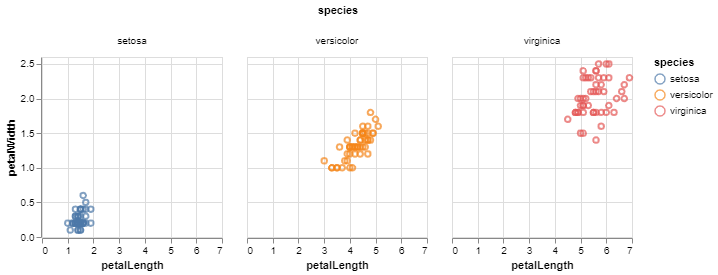

In [10]:
alt.Chart(iris).mark_point().encode(
    x='petalLength:Q',
    y='petalWidth:Q',
    color='species:N'
).properties(
    width=180,
    height=180
).facet(
    column='species:N'
)

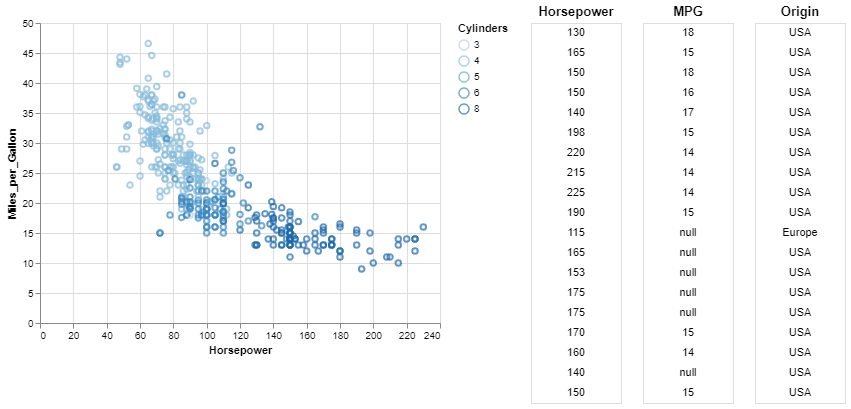

In [2]:
import altair as alt
from vega_datasets import data

source = data.cars()

# Brush for selection
brush = alt.selection(type='interval')

# Scatter Plot
points = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Cylinders:O', alt.value('grey'))
).add_selection(brush)

# Base chart for data tables
ranked_text = alt.Chart(source).mark_text().encode(
    y=alt.Y('row_number:O',axis=None)
).transform_window(
    row_number='row_number()'
).transform_filter(
    brush
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank<20
)

# Data Tables
horsepower = ranked_text.encode(text='Horsepower:N').properties(title='Horsepower')
mpg = ranked_text.encode(text='Miles_per_Gallon:N').properties(title='MPG')
origin = ranked_text.encode(text='Origin:N').properties(title='Origin')
text = alt.hconcat(horsepower, mpg, origin) # Combine data tables

# Build chart
alt.hconcat(
    points,
    text
).resolve_legend(
    color="independent"
)

# Layers

https://altair-viz.github.io/user_guide/compound_charts.html#order-of-layers

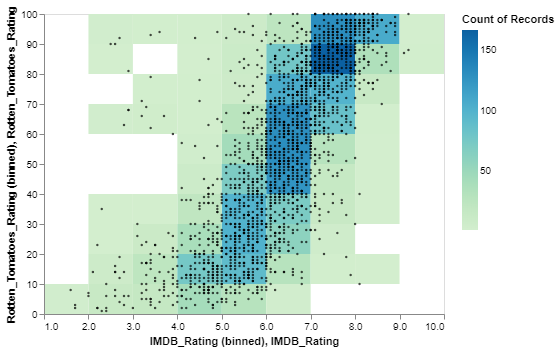

In [11]:
import altair as alt
from vega_datasets import data

source = data.movies.url

heatmap = alt.Chart(source).mark_rect().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=True),
    alt.Color('count()', scale=alt.Scale(scheme='greenblue'))
)

points = alt.Chart(source).mark_circle(
    color='black',
    size=5,
).encode(
    x='IMDB_Rating:Q',
    y='Rotten_Tomatoes_Rating:Q',
)

heatmap + points # <<< Alternatively use alt.layer(layer1, layer2). Layer 1 is below layer 2

# Transforms
https://altair-viz.github.io/user_guide/transform.html#user-guide-bin-transform

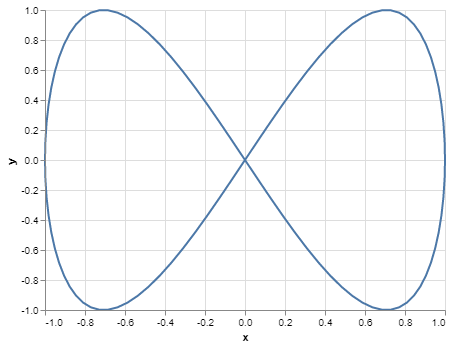

In [12]:
import altair as alt
import pandas as pd

data = pd.DataFrame({'t': range(101)})

alt.Chart(data).mark_line().encode(
    x='x:Q',
    y='y:Q',
    order='t:Q'
).transform_calculate(
    x='cos(datum.t * PI / 50)',
    y='sin(datum.t * PI / 25)'
)